# Primeiro Modelo de Árvode de Decisão
 - Simulação de uma planilha real onde chamados são armazenados e o SLA são respeitados ou não

 - O modelo deve ser capaz de prever se os chamados serão atendidos dentro do SLA.

 - Posteriormente ao treinamento e testes, uma predição real será feita para ver como o modelo se sairia em um cenário verdadeiro


 - Após familiarizado com o funcionamento de uma Árvore de Decisão, o mesmo teste será replicado com uma **Random Forest**

In [1]:
import pandas as pd
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [77]:
# realizando a conexão com o github e importando a base de dados
from google.colab import drive

# utilizar o github antes de upar para o repositório
url = 'https://raw.githubusercontent.com/Davi303004/PP4-Projetos_Python_Colab/refs/heads/main/Data/decision_data.csv'
df = pd.read_csv(url)

df.head()

,id_chamado,categoria,equipamento,prioridade,solicitante,equipe_destinada,localizacao,hora_registro,dia_semana,chamados_previos,carga_equipe,tempo_atendimento_horas,sla_atendida
0,5096,SOLICITAÇÃO,Roteador,MEDIA,Gerente,Compras,Andar3,8,Quinta,0,baixa,0.50,SIM
1,5016,MANUTENÇÃO,Nobreak,BAIXA,Financeiro,Suporte TI,Andar2,16,Segunda,1,media,78.93,NAO
2,5031,SOLICITAÇÃO,Nobreak,ALTA,Analista,Infraestrutura,Andar1,8,Quinta,1,media,5.74,SIM
3,5159,PROBLEMA,Nobreak,ALTA,RH,Administrativo,Andar2,15,Quinta,2,media,8.36,NAO
4,5129,SOLICITAÇÃO,Monitor,ALTA,Suporte,Suporte TI,Andar2,13,Sabado,1,baixa,6.74,SIM


In [78]:
# criando função de limpeza de dados e realizando a limpeza
def limpando_df(df):
  df.categoria = df.categoria.map({'SOLICITAÇÃO': 1,'PROBLEMA': 2,'MANUTENÇÃO': 3})
  df.solicitante = df.solicitante.map({'Gerente': 1, 'Analista' : 2, 'Desenvolvedor': 3, 'Suporte': 4,'Financeiro': 5, 'RH': 6, 'Suporte': 7})
  df.prioridade = df.prioridade.map({'BAIXA': 0,'MEDIA': 1,'ALTA': 2,'CRITICA': 3})
  df.equipe_destinada = df.equipe_destinada.map({'Compras': 1,'Desenvolvimento': 2,'Administrativo': 3,'Suporte TI': 4,'Infraestrutura': 5,'Segurança da Informação': 6})
  df.localizacao = df.localizacao.map({'Remoto': 0,'Andar1': 1,'Andar2': 2, 'Andar3': 3})
  df.dia_semana = df.dia_semana.map({'Domingo': 1, 'Segunda': 2, 'Terca': 3, 'Quarta': 4, 'Quinta': 5, 'Sexta': 6,'Sabado': 7})
  df.carga_equipe = df.carga_equipe.map({'baixa': 0,'media': 1,'alta': 2})
  return df


df_limpo = limpando_df(df)

In [79]:
# separando as features e o target
X = df_limpo.drop(['id_chamado','equipamento','chamados_previos','tempo_atendimento_horas','sla_atendida'],axis=1)
Y = df_limpo.sla_atendida

# separando os dados de treinamento e de testes
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.20)

# criando e treinando o modelo
Dtree = tree.DecisionTreeClassifier()
Dtree.fit(X_train,Y_train)

DecisionTreeClassifier()

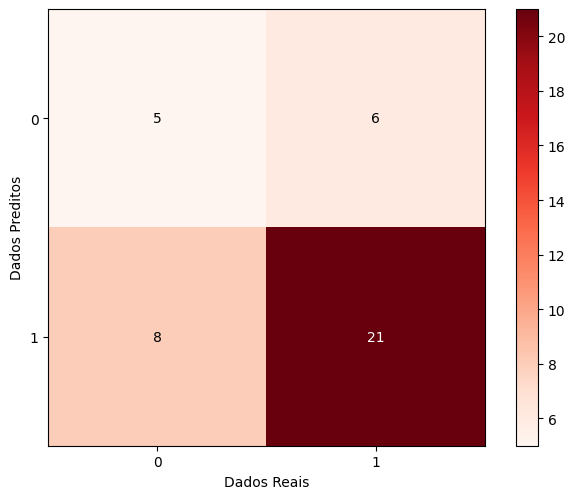

In [113]:
# realizando os testes
Y_predict = Dtree.predict(X_test)

# comparando a predição
Y_pred = pd.DataFrame(Y_predict,columns=['sla_previsto'])
Y_test = Y_test.reset_index(drop=True)

# conferindo a precisão do modelo
cm = confusion_matrix(Y_test,Y_predict)

# criando a visualização da precisão
fig, ax = plt.subplots()
im = ax.imshow(cm,cmap='Reds')
plt.colorbar(im)

# adicionando os valores para cada campo
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        text_color = "white" if cm[i, j] > cm.max()/2 else "black"
        ax.text(j, i, f'{cm[i, j]}', ha="center", va="center", color=text_color)

# alterando os rótulos dos eixos
plt.xticks([0,1])
plt.yticks([0,1])
ax.set_xlabel('Dados Reais')
ax.set_ylabel('Dados Preditos')

plt.tight_layout(pad=0)
plt.show()

In [118]:
# importando o CSV com os dados da previsão real
url2 = 'https://raw.githubusercontent.com/Davi303004/PP4-Projetos_Python_Colab/refs/heads/main/Data/prediction_decision_data.csv'
df2 = pd.read_csv(url2)

# limpando os dados para uso
df2_limpo = limpando_df(df2)

In [119]:
# previsão real com a decision tree

# separando os dados para uso
X_pred = df2_limpo.drop(['id_chamado','equipamento','chamados_previos'],axis=1)

# realizando a predição
Y2_pred = Dtree.predict(X_pred)

Y2_pred_df = pd.DataFrame(Y2_pred,columns=['sla_previsto_T'])

result = pd.concat([df2,Y2_pred_df],axis=1)
result.head()

,id_chamado,categoria,equipamento,prioridade,solicitante,equipe_destinada,localizacao,hora_registro,dia_semana,chamados_previos,carga_equipe,sla_previsto_T
0,8005,1,Impressora,1,2,2,0,8,6,2,1,SIM
1,8118,2,Headset,2,5,5,3,12,3,1,2,NAO
2,8113,1,Servidor,2,1,1,0,17,6,2,0,SIM
3,8105,2,Servidor,2,7,6,0,16,2,2,1,SIM
4,8032,3,Tablet,2,3,5,0,15,4,4,0,NAO


In [93]:
from sklearn.ensemble import RandomForestClassifier

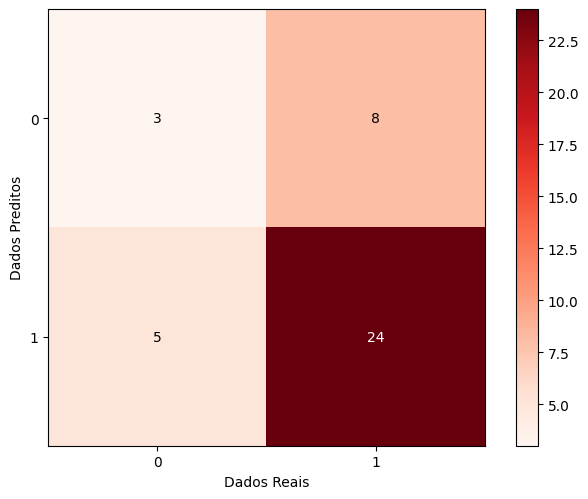

In [120]:
# criando uma Random Forest com 250 árvores

Rf = RandomForestClassifier(n_estimators = 250)

# treinando a floresta
Rf.fit(X_train,Y_train)

# testando a floresta
Y_fpred = Rf.predict(X_test)

# testando a precisão da floresta
cm2 = confusion_matrix(Y_test,Y_fpred)

# criando a visualização da precisão
fig, ax = plt.subplots()
im = ax.imshow(cm2,cmap='Reds')
plt.colorbar(im)

# adicionando os valores para cada campo
for i in range(cm2.shape[0]):
    for j in range(cm2.shape[1]):
        text_color = "white" if cm2[i, j] > cm2.max()/2 else "black"
        ax.text(j, i, f'{cm2[i, j]}', ha="center", va="center", color=text_color)

# alterando os rótulos dos eixos
plt.xticks([0,1])
plt.yticks([0,1])
ax.set_xlabel('Dados Reais')
ax.set_ylabel('Dados Preditos')

plt.tight_layout(pad=0)
plt.show()

In [121]:
# predição real com a random forest

Y2_fpred = Rf.predict(X_pred)

Y2_fpred_df = pd.DataFrame(Y2_fpred,columns=['sla_previsto_F'])

result = pd.concat([result,Y2_fpred_df],axis=1)
result.head()

,id_chamado,categoria,equipamento,prioridade,solicitante,equipe_destinada,localizacao,hora_registro,dia_semana,chamados_previos,carga_equipe,sla_previsto_T,sla_previsto_F
0,8005,1,Impressora,1,2,2,0,8,6,2,1,SIM,SIM
1,8118,2,Headset,2,5,5,3,12,3,1,2,NAO,NAO
2,8113,1,Servidor,2,1,1,0,17,6,2,0,SIM,SIM
3,8105,2,Servidor,2,7,6,0,16,2,2,1,SIM,SIM
4,8032,3,Tablet,2,3,5,0,15,4,4,0,NAO,NAO
